In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

import re

In [2]:
from parser import parser

In [3]:
wiki_data = parser(['/home/kara/Documents/Courses/Fall 2021/LING412 - RESEARCH & WRITING/Repos/turkish-treebanks/data/wiki.conllu','/home/kara/Documents/Courses/Fall 2021/LING412 - RESEARCH & WRITING/Repos/turkish-treebanks/data/web.conllu'],output_name='wiki_parsed')

## Functions


In [3]:
def import_data(file_name, parsed=True):
    if not parsed:
        parser(file_name,output_name=file_name.split(".")[0])
        file_name = file_name.split(".")[0]+".txt"
    
    data = open(f"{file_name}", 'r', encoding='utf-8').read()
    pairs = [token.split('\t') for token in data.split('\n')]
    
    return pairs    

In [5]:
total_pairs = import_data('/home/kara/Documents/Courses/Fall 2021/LING412 - RESEARCH & WRITING/parse_dataset.txt')
# web_pairs = import_data("/home/kara/Documents/Courses/Fall 2021/LING412 - RESEARCH & WRITING/Scripts/web_data.txt")
# trmorph18_pairs = import_data("/home/kara/Documents/Courses/Fall 2021/LING412 - RESEARCH & WRITING/Data/TrMor2018/TrMor2018/trmor2018.train")

In [6]:
total_pairs[1]

['da', 'da+PRT+Proper=False', 'tr-forum:00000222:S023']

In [6]:
# morse_pairs = [(token) for token in trmorph18_pairs if not token[0].startswith("<")]

In [7]:
def get_tag_counts(pairs):
    try:
        morphs = [token[1] for token in pairs]
    except:
        morphs = [token[1] for token in pairs[:-1]]

    pos = [token.split("+")[1] for token in morphs if token != "?"]
    feats = [token.split("+")[2:] for token in morphs]
    feat_extend = []
    for feat in feats:
        feat_extend.extend(feat)

    return pd.Series(pos).value_counts(), pd.Series(feat_extend).value_counts()

## Unique Tokens

In [8]:
token_list = [i[0] for i in total_pairs]

In [9]:
len(pd.Series(token_list).unique())

25773

In [12]:
print(f"""Total Dataset
Total type: {len(token_list)}
Total token: {len(pd.Series(token_list).unique())}""")

Total Dataset
Total type: 66445
Total token: 25773


In [10]:
token_count = pd.Series(token_list).value_counts()
token_count[token_count > 100]

.             4188
,             2340
ve            1610
bir           1000
bu             410
için           404
-              374
da             374
)              351
(              351
ile            345
olarak         334
?              307
Bu             288
''             287
de             274
``             270
olan           242
çok            221
daha           215
sonra          196
gibi           184
...            161
:              148
en             145
ilk            143
kadar          139
tarafından     133
ise            124
;              121
veya           116
büyük          101
dtype: int64

## POS - Feature Count

In [19]:
total_pos_counts, total_feats_counts = get_tag_counts(total_pairs)

In [20]:
wiki_pos_counts, wiki_feats_counts = get_tag_counts(wiki_pairs)

In [16]:
morse_pos_counts, morse_feats_counts = get_tag_counts(trmorph18_pairs_parsed)

NameError: name 'trmorph18_pairs_parsed' is not defined

In [21]:
def plot_pos(counts):
    plt.rcParams['figure.figsize'] = [12, 3]
    plt.bar(counts.index, counts.values)
    
def plot_feats(counts):
    plt.rcParams['figure.figsize'] = [250, 3]
    plt.bar(counts.index, counts.values)

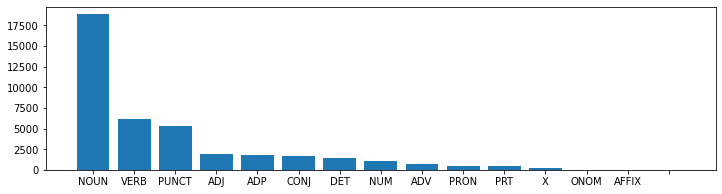

In [22]:
plot_pos(wiki_pos_counts)

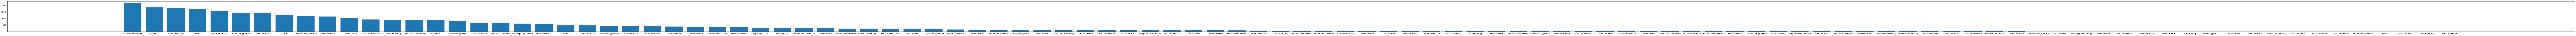

In [23]:
plot_feats(wiki_feats_counts[10:])

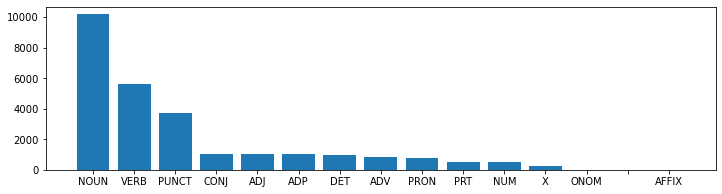

In [24]:
plot_pos(web_pos_counts)

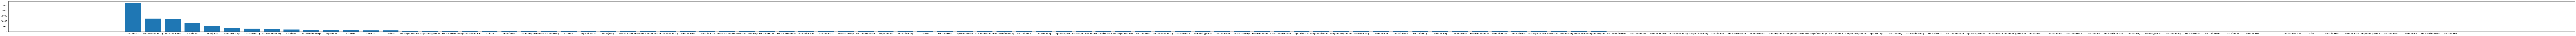

In [25]:
plot_feats(web_feats_counts)

In [26]:
plt.rcParams['figure.figsize'] = [12, 3]
plot_pos(morse_pos_counts)

NameError: name 'morse_pos_counts' is not defined

In [ ]:
plot_feats(morse_feats_counts)

### Input Output Lengths

In [28]:
def input_output_length(pairs):
    raws = [i[0] for i in pairs[:-1]]
    morphs = [i[1] for i in pairs[:-1]]

    input_seq_length = []
    output_seq_length = []

    for token in raws:
        input_seq_length.append(len(token))

    for token in morphs:
        tokens = token.split("+")
        output_seq_length.append(len(tokens))

    input_seq_length = pd.Series(input_seq_length)
    output_seq_length = pd.Series(output_seq_length)
    
    return input_seq_length, output_seq_length

In [29]:
web_input_length, web_output_length = input_output_length(web_pairs)

In [30]:
web_input_length.describe()

count    26508.000000
mean         5.551833
std          3.369566
min          1.000000
25%          3.000000
50%          5.000000
75%          8.000000
max         28.000000
dtype: float64

In [31]:
web_output_length.describe()

count    26508.000000
mean         5.712238
std          2.640413
min          2.000000
25%          3.000000
50%          6.000000
75%          7.000000
max         19.000000
dtype: float64

In [32]:
wiki_input_length, wiki_output_length = input_output_length(wiki_pairs)

In [33]:
wiki_input_length.describe()

count    39932.000000
mean         5.844686
std          3.429878
min          1.000000
25%          3.000000
50%          6.000000
75%          8.000000
max         24.000000
dtype: float64

In [34]:
wiki_output_length.describe()

count    39932.000000
mean         5.699990
std          2.547301
min          2.000000
25%          4.000000
50%          6.000000
75%          7.000000
max         23.000000
dtype: float64

In [35]:
morse_input_length, morse_output_length = input_output_length(morse_pairs)

In [120]:
morse_input_length.describe()

count    460669.000000
mean          5.618579
std           3.482500
min           1.000000
25%           3.000000
50%           5.000000
75%           8.000000
max          49.000000
dtype: float64

In [121]:
morse_output_length.describe()

count    460669.000000
mean          4.443275
std           2.210145
min           1.000000
25%           2.000000
50%           5.000000
75%           5.000000
max          20.000000
dtype: float64

## Evaluation

Precision & Recall & f-1

In [170]:
with open("a.txt","r",encoding="utf-8") as f_in:
    evals = f_in.read().split(">\n<")
    evals = [s.split("\n")[1:-1] for s in evals]
    

In [171]:
len("Model output: ")

14

In [172]:
len("True output: ")

13

In [173]:
def parse_output(eval):
    _, model, true = tuple(eval)
    model = model[14:]
    true = true[13:]
    return model, true

[TenseAspectMood=Fut] vs [Derivation=FutPart]

In [166]:
evals[3]

['Input token: bozulmak',
 'Model output: bozul[VERB][Polarity=Pos][Proper=False][Derivation=Inf][PersonNumber=A3sg][Possessive=Pnon][Case=Bare][Proper=False]',
 'True output: boz[VERB][Proper=False][Derivation=Pass][Polarity=Pos][Proper=False][Derivation=Inf][PersonNumber=A3sg][Possessive=Pnon][Case=Nom][Proper=False]']

In [176]:
output = []
for e in evals:
    try:
        output.append(parse_output(e))
    except:
        pass

In [180]:
output[-1]

('detay[NOUN][PersonNumber=A3sg][Possessive=Pnon][Case=Bare][Proper=False][Derivation=With][Proper=False]',
 'detay[NOUN][PersonNumber=A3sg][Possessive=Pnon][Case=Bare][Proper=False][Derivation=With][Proper=False]')

In [181]:
model_pos_output= []
true_pos_output= []

model_total_output= []
true_total_output= []
for e in output:
    model, true = e
    model= model.replace("["," [")
    true= true.replace("["," [")
    model_feats = model.split()
    true_feats = true.split()     
    
    try:
        model_pos_output.append(model_feats[1])
        true_pos_output.append(true_feats[1])

        model_total_output.append(model_feats[1:])
        true_total_output.append(true_feats[1:]) 
        
    except:
        model_pos_output.append(model_feats[0])
        true_pos_output.append(true_feats[0])

        model_total_output.append(model_feats[0])
        true_total_output.append(true_feats[0]) 

In [182]:
pd.Series(model_pos_output).value_counts()

[NOUN]     934
[VERB]     370
[PUNCT]    269
[ADP]      113
[DET]       83
[CONJ]      67
[NUM]       48
[ADJ]       40
[PRT]       33
[ADV]       30
[PRON]      21
[X]          6
dtype: int64

In [183]:
pd.Series(true_pos_output).value_counts()

[NOUN]     891
[VERB]     366
[PUNCT]    268
[ADP]       90
[ADJ]       89
[CONJ]      72
[DET]       70
[ADV]       50
[NUM]       43
[PRON]      36
[PRT]       29
[X]         10
dtype: int64

In [184]:
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score

In [185]:
clf_report = confusion_matrix(true_pos_output,
                              model_pos_output,
                              labels=list(pd.Series(true_pos_output).value_counts().index),)

<AxesSubplot:>

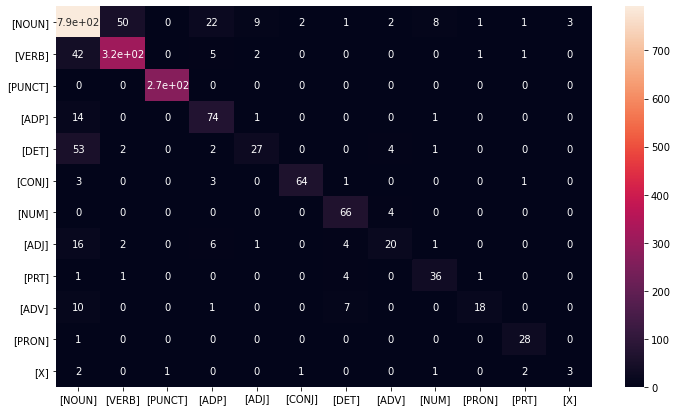

In [186]:
plt.rcParams['figure.figsize'] = [12,7]
sns.heatmap(pd.DataFrame(clf_report), 
            annot=True,
            xticklabels=list(pd.Series(true_pos_output).value_counts().index), 
            yticklabels=list(pd.Series(model_pos_output).value_counts().index))

In [187]:
true_total_output[2]

['[NOUN]',
 '[PersonNumber=A3sg]',
 '[Possessive=Pnon]',
 '[Case=Bare]',
 '[Proper=False]']

In [188]:
model_total_output[2]

['[NOUN]',
 '[PersonNumber=A3sg]',
 '[Possessive=Pnon]',
 '[Case=Bare]',
 '[Proper=False]']

In [191]:
def calculate_precision(y_pred,y_true):

    precisions = []
    recalls = []

    for true,pred in zip(y_true,y_pred):
        try:
            max_precision = 0
            max_recall = 0

            x = true
            y = pred

            if len(x) > 0 and len(y) > 0:
                shared_items = dict()
                for k in x:
                    if (k in y) and (x.index(k) == y.index(k)):
                        shared_items[k] = x.index(k)

                recall = len(shared_items)/len(x)
                precision = len(shared_items)/len(y)

                if precision > max_precision:
                    max_precision = precision

                if recall > max_recall:
                    max_recall = recall

            precisions.append(max_precision)
            recalls.append(max_recall)

        except KeyError:
            precisions.append(0)
            recalls.append(0)


    sum = 0
    for item in precisions:
        sum += item
    print('average_precision =', sum/len(precisions)) 
    average_precision = sum/len(precisions)

    sum = 0

    for item in recalls:
        sum += item

    print('average_recall =', sum/len(recalls))
    average_recall = sum/len(precisions)

    
    return average_precision, average_recall

In [193]:
precision,recall = calculate_precision(model_total_output,true_total_output)

average_precision = 0.7651761815366549
average_recall = 0.7599746482690838


In [194]:
!pip install tensorflow==2.6.0

     |████████████████████████████████| 458.4 MB 13 kB/s  eta 0:00:013   |█▎                              | 18.7 MB 917 kB/s eta 0:08:00     |█▍                              | 19.7 MB 917 kB/s eta 0:07:59     |█▋                              | 22.9 MB 9.6 MB/s eta 0:00:46     |██▏                             | 30.5 MB 6.9 MB/s eta 0:01:02     |███▌                            | 50.3 MB 6.3 MB/s eta 0:01:06     |███▋                            | 51.7 MB 6.3 MB/s eta 0:01:05     |████                            | 57.9 MB 6.1 MB/s eta 0:01:06     |████▌                           | 65.2 MB 3.4 MB/s eta 0:01:58     |█████                           | 71.3 MB 25.5 MB/s eta 0:00:16     |█████▊                          | 81.4 MB 6.4 MB/s eta 0:00:59     |█████▊                          | 81.6 MB 6.4 MB/s eta 0:00:59     |██████                          | 87.4 MB 3.3 MB/s eta 0:01:53     |███████▏                        | 102.8 MB 9.7 MB/s eta 0:00:37     |████████████▊                   | 182.5 

     |████████████████████████████████| 5.8 MB 405 kB/s eta 0:00:01
     |████████████████████████████████| 462 kB 5.4 MB/s eta 0:00:01
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
     |████████████████████████████████| 3.9 MB 5.6 MB/s eta 0:00:01
     |████████████████████████████████| 155 kB 5.5 MB/s eta 0:00:01
  Using cached tensorboard_plugin_wit-1.8.0-py3-none-any.whl (781 kB)
  Using cached tensorboard_data_server-0.6.1-py3-none-manylinux2010_x86_64.whl (4.9 MB)
  Using cached requests_oauthlib-1.3.0-py2.py3-none-any.whl (23 kB)
  Using cached oauthlib-3.1.1-py2.py3-none-any.whl (146 kB)
  Created wheel for clang: filename=clang-5.0-py3-none-any.whl size=30702 sha256=75d4d322851dafd517ccb00a042fd5436975ff25125b0421d19a306f51c61a7b
  Stored in directory: /home/kara/.cache/pip/wheels/f1/60/77/22b9b5887bd47801796a856f47650d9789c74dc3161a26d608
Successfully built clang
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.1
    Uninstalling numpy-1.2

AttributeError: module 'keras.api._v2.keras.models' has no attribute 'load'